# Mental Health in the Tech Industry:  A Data-Driven Deep Dive

## Author: Martynas Loveikis
Welcome to this exploratory data analysis of the Mental Health in the Tech Industry dataset.  Prepare to delve into the often unspoken struggles faced by tech professionals as we uncover patterns, correlations, and potential insights into this critical issue.

**Objective:**

To unravel the complexities surrounding mental health within the tech industry, examining the prevalence of mental health conditions, identifying potential contributing factors, and exploring relationships between demographics and well-being.  

**The Data at Hand:**

Our dataset, curated from employee surveys and other sources, holds a wealth of information on the mental health landscape within the tech world.  We'll wield the power of statistics and visualization to make sense of this valuable resource. 

**What to Expect:**

* **Data Cleaning & Exploration:**  We'll tidy up the dataset, familiarize ourselves with its nuances, and unearth initial insights through summary statistics and visualizations.
* **Outlier Analysis:** We'll hunt for unusual data points that might hold important clues or indicate potential errors.
* **Contingency Tables (Cross-tabulation):** We'll construct contingency tables to summarize the relationship between pairs of categorical variables, aiming to reveal associations and potential dependencies. 

_**Caution:** While this analysis aims to be informative, it's crucial to remember that mental health is a deeply personal and complex issue. Our findings are just one piece of the puzzle, not a definitive answer to this multifaceted problem._


**Let's embark on this journey of discovery, using data as a tool to shed light on mental health in the tech world!** 

### 1. Initialization:  Gathering Our Tools and Treasures

_In this opening act, we'll summon our trusty libraries, call forth our meticulously crafted datasets, and prepare for the statistical sorcery to come._


In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%run get_pickles.ipynb

View 'united_table' replaced successfully.
Saved DataFrame 'df_united' to pickles\df_united.pkl
Saved DataFrame 'df_participants' to pickles\df_participants.pkl
Saved DataFrame 'df_additional_genders' to pickles\df_additional_genders.pkl
Saved DataFrame 'df_countries' to pickles\df_countries.pkl
Saved DataFrame 'df_mental_age_groups' to pickles\df_mental_age_groups.pkl
Saved DataFrame 'df_mental_races_genders' to pickles\df_mental_races_genders.pkl


In [3]:
pickle_directory = Path.cwd() / 'pickles'

all_dfs = {
	file.stem: pd.read_pickle(file)
	for file in pickle_directory.glob('*.pkl')
}

In [4]:
df_united.info()
print(df_united.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236898 entries, 0 to 236897
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AnswerText    236898 non-null  object
 1   SurveyID      236898 non-null  int64 
 2   UserID        236898 non-null  int64 
 3   questionid    236898 non-null  int64 
 4   questiontext  236898 non-null  object
dtypes: int64(3), object(2)
memory usage: 9.0+ MB
  AnswerText  SurveyID  UserID  questionid       questiontext
0         37      2014       1           1  What is your age?
1         44      2014       2           1  What is your age?
2         32      2014       3           1  What is your age?
3         31      2014       4           1  What is your age?
4         31      2014       5           1  What is your age?


In [5]:
df_united.nunique()

AnswerText      4215
SurveyID           5
UserID          4218
questionid       105
questiontext     105
dtype: int64

In [6]:
df_united.describe()

,SurveyID,UserID,questionid
count,236898.000000,236898.000000,236898.000000
mean,2016.572297,2514.516619,48.655898
std,1.421134,1099.462747,36.126215
min,2014.000000,1.000000,1.000000
25%,2016.000000,1691.000000,15.000000
50%,2016.000000,2652.000000,48.000000
75%,2017.000000,3439.000000,80.000000
max,2019.000000,4218.000000,118.000000


_**Note:** From the main crafted table, only a few numerical columns are available for investigation using the `describe()` method. We'll also take a quick look at the unique value counts within our table for a preliminary overview._

In [7]:
outliers_summary = {'mild': {}, 'extreme': {}}

for column in df_united.select_dtypes(include='number'):
	Q1 = df_united[column].quantile(0.25)
	Q3 = df_united[column].quantile(0.75)
	IQR = Q3 - Q1

	mild_outliers = ((df_united[column] < Q1 - 1.5 * IQR) |
	                 (df_united[column] > Q3 + 1.5 * IQR)).sum()
	extreme_outliers = ((df_united[column] < Q1 - 3 * IQR) |
	                    (df_united[column] > Q3 + 3 * IQR)).sum()

	outliers_summary['mild'][column] = mild_outliers
	outliers_summary['extreme'][column] = extreme_outliers

print('Summary of outliers:')
for category, category_outliers in outliers_summary.items():
	print('-----------------------------------\n'
	      f'{category.capitalize()} outliers:'
	      '\n-----------------------------------')
	for column, num_outliers in category_outliers.items():
		print(f'|{column}|: {num_outliers} outliers')

Summary of outliers:
-----------------------------------
Mild outliers:
-----------------------------------
|SurveyID|: 59512 outliers
|UserID|: 0 outliers
|questionid|: 0 outliers
-----------------------------------
Extreme outliers:
-----------------------------------
|SurveyID|: 0 outliers
|UserID|: 0 outliers
|questionid|: 0 outliers


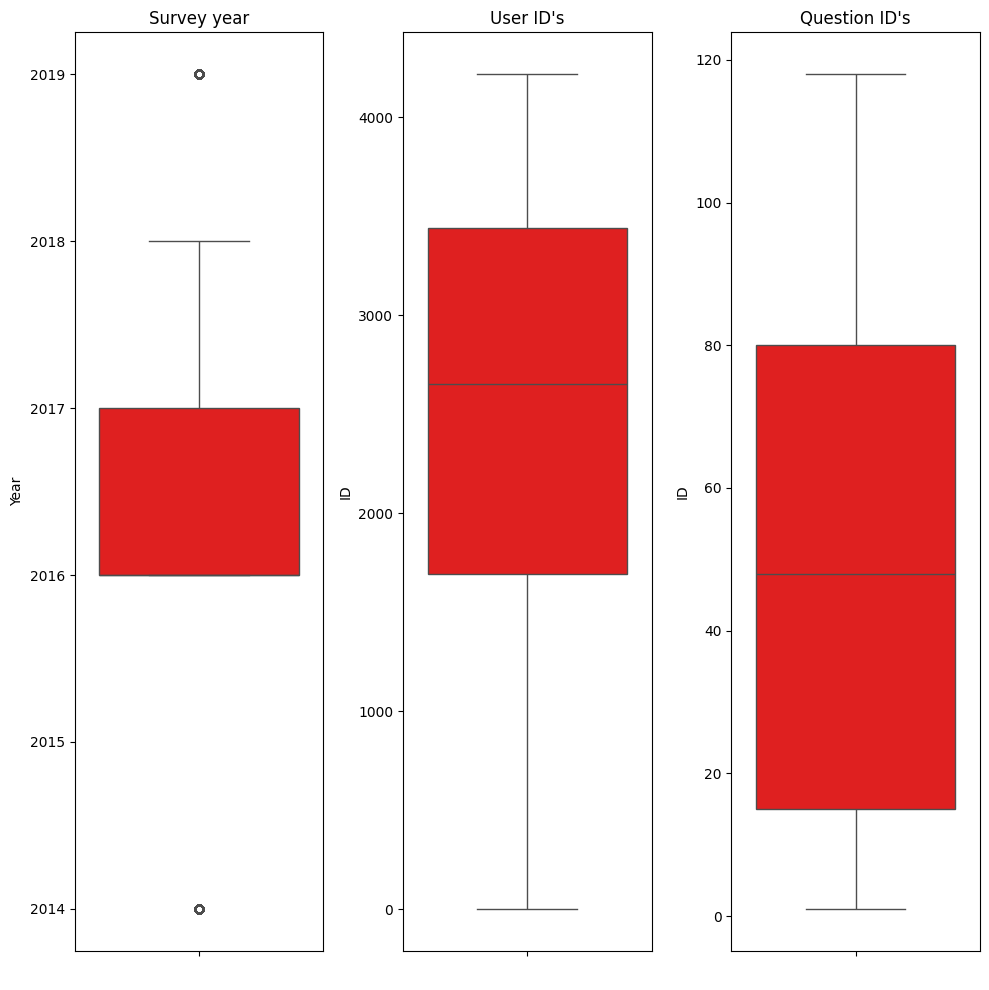

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
fc.plot_boxplot(df_united, 'SurveyID',
                'Survey year', ' ',
                'Year', axes[0])
fc.plot_boxplot(df_united, 'UserID',
                'User ID\'s', ' ',
                'ID', axes[1])
fc.plot_boxplot(df_united, 'questionid',
                'Question ID\'s', ' ',
                'ID', axes[2])
plt.tight_layout()

### 2. Outlier Summary: Survey Year Nuances

* **Survey Year (Not Outliers):** The analysis revealed mild outliers in `SurveyID`, but these aren't a cause for concern. They reflect the distribution of surveys, with 50% collected between 2016-2017. 
* **Visualizing Categorical Data:** While boxplots were initially used, they may not be the most appropriate for categorical data like `SurveyID`. We'll explore alternative visualizations in this notebook in the future.

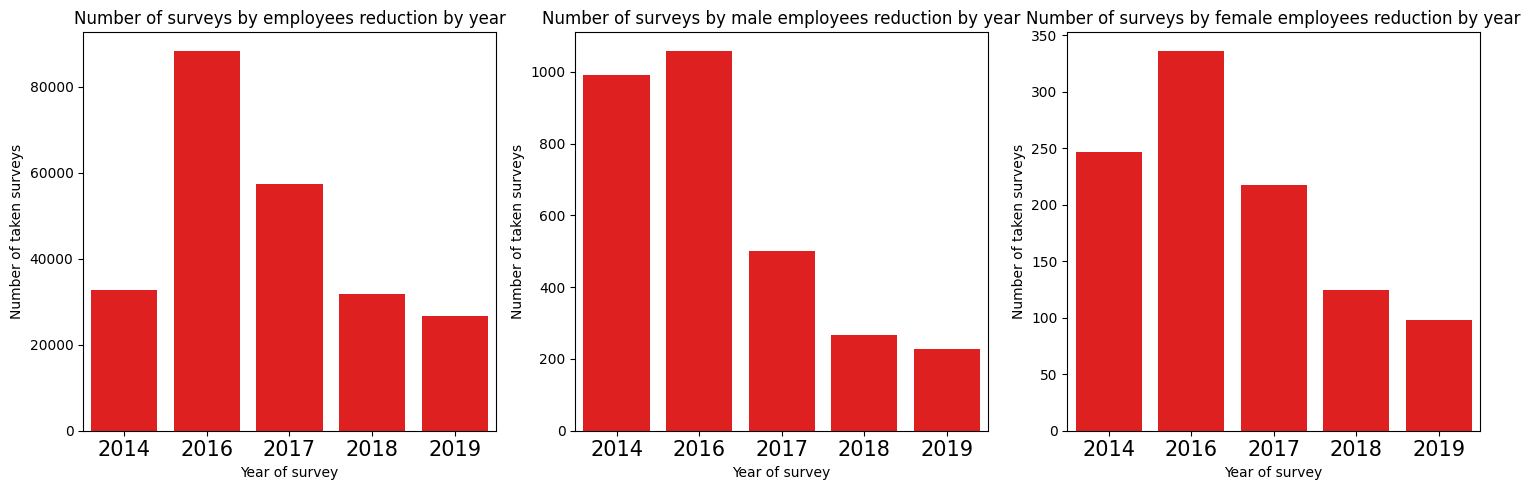

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fc.plot_values(df_participants, 'YEAR OF SURVEY', 'OVERALL SURVEY COUNT',
               'Number of surveys by employees reduction by year',
               'Year of survey', 'Number of taken surveys', axes[0],
               rotation=0)
fc.plot_values(df_participants, 'YEAR OF SURVEY', 'MALE SURVEY COUNT',
               'Number of surveys by male employees reduction by year',
               'Year of survey', 'Number of taken surveys',
               axes[1], rotation=0)
fc.plot_values(df_participants, 'YEAR OF SURVEY', 'FEMALE SURVEY COUNT',
               'Number of surveys by female employees reduction by year',
               'Year of survey', 'Number of taken surveys',
               axes[2], rotation=0)
plt.tight_layout()
plt.show()

### 3. Visualizing the Data: Exploring Patterns and Trends 

The plots above illustrate a concerning trend: survey participation across the board is on a downward spiral. Whether it's the entire workforce, males, or females, the numbers tell a tale of dwindling engagement.

* **All Employees:** The sharpest decline occurred between 2016 and 2017, with a less steep but continuous decrease in subsequent years. 
* **Males:** This group mirrors the overall trend, suggesting the decline isn't gender-specific.
* **Females:** While fewer in number, female respondents show a similar drop-off, reinforcing the overall pattern.

_While we appreciate the diversity captured in this data, the underrepresentation of certain groups (particularly non-male genders and respondents outside North America/Western Europe) warrants careful consideration when interpreting the results._


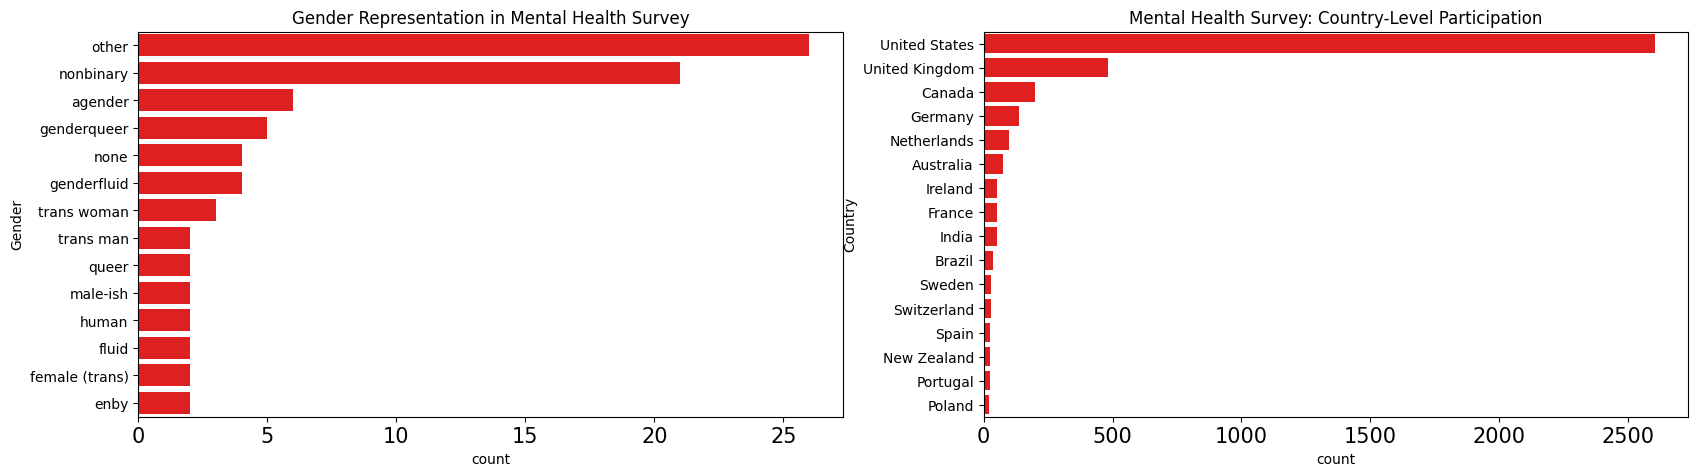

In [10]:
Afig, axes = plt.subplots(1, 2, figsize=(20, 5))
fc.plot_values(df_additional_genders, 'gender_count', 'gender',
               'Gender Representation in Mental Health Survey',
               'count', 'Gender', axes[0], rotation=0)

fc.plot_values(df_countries, 'country_count', 'country',
               'Mental Health Survey: Country-Level Participation',
               'count', 'Country', axes[1], rotation=0)

### 4. Survey Demographics: A Glimpse into Representation

_Let's take a closer look at who's participating in these mental health surveys._


The bar charts above offer a snapshot of gender and country representation within our dataset:

* **Gender Diversity:** The tech industry's reputation for male dominance appears to hold true in our sample. However, the presence of various gender identities (though in smaller numbers) suggests a potential shift towards greater inclusivity.  
* **Geographic Concentration:** The United States dominates survey participation, followed by the UK and Canada. This raises questions about the generalizability of our findings to other regions and the need for more diverse representation in future surveys.

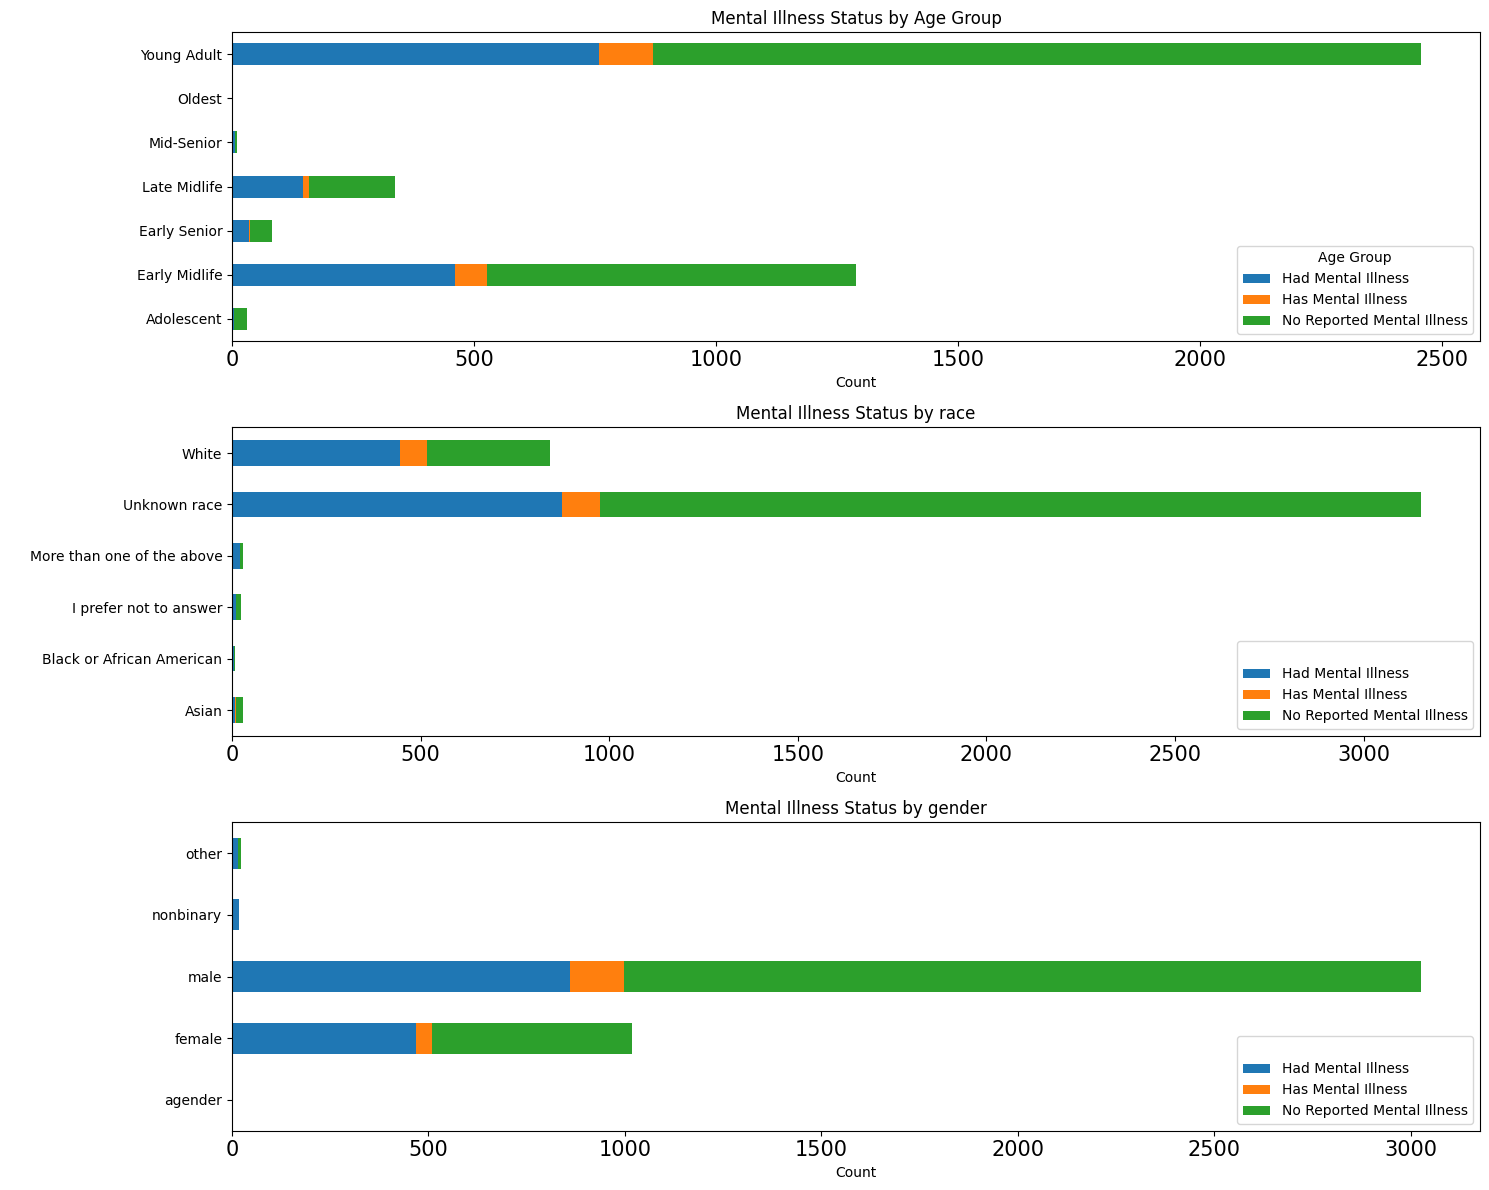

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(15, 12))

fc.plot_stacked_bar_chart(df_mental_age_groups, 'mental_illness_status',
                          'age_group', 'age_count',
                          title='Mental Illness Status by Age Group',
                          xlabel='Count',
                          ylabel=' ',
                          legend_title='Age Group',
                          ax=ax[0])

fc.plot_stacked_bar_chart(df_mental_races_genders, 'mental_illness_status',
                          'race', 'count',
                          title='Mental Illness Status by race',
                          xlabel='Count',
                          ylabel=' ',
                          legend_title=' ',
                          ax=ax[1])
fc.plot_stacked_bar_chart(df_mental_races_genders, 'mental_illness_status',
                          'gender', 'count',
                          title='Mental Illness Status by gender',
                          xlabel='Count',
                          ylabel=' ',
                          legend_title=' ',
                          ax=ax[2])
plt.tight_layout()
plt.show()

### 5. Mental Health Across Demographics: Key Insights

_Our visualizations reveal a nuanced picture of mental health in the tech industry:_

*   **Young Adults Vulnerable:** The "Young Adult" group reports the highest rates of mental illness, aligning with broader trends.
*   **Underreporting Concerns:** High "No Reported Mental Illness" rates in the "Early Midlife" group, despite significant numbers experiencing issues, suggest potential underreporting.
*   **White Dominance:** White respondents are overrepresented, potentially masking experiences of other racial groups.
*   **Gender Disparities:** Females report higher rates of mental illness than males.

_**Note:** Limited data on non-white and non-binary individuals hinders comprehensive conclusions._

This analysis highlights the need for targeted support, particularly for young adults and women, and improved data collection to better understand the mental health landscape across the diverse tech workforce.

## Conclusion & Future Directions

This exploratory data analysis sheds light on the mental health landscape in the tech industry, revealing a complex picture with notable challenges:

* **Prevalence and Underreporting:** Mental health issues are prevalent, particularly among young adults, but there's a concerning possibility of underreporting, especially in specific demographic groups.
* **Demographic Disparities:** The experiences of women and minorities are underrepresented in the data, limiting our understanding of their specific mental health challenges.
* **Declining Engagement:** The decrease in survey participation over time is a red flag, suggesting potential issues with employee morale or survey fatigue.

### For a More Comprehensive Picture

Future research should aim to address these limitations:

* **Expand Data Collection:**  Actively seek input from diverse groups within the tech industry, including women, minorities, and individuals outside North America/Western Europe.
* **Refine Survey Methodology:** Develop a broader range of questions that capture a wider spectrum of mental health concerns and their impact on work, while minimizing underreporting bias.
* **Incorporate Additional Factors:**  Explore the influence of job demands, workplace culture, and access to mental health resources.  **Include questions to assess the impact of geographic location on mental health.**
* **Deeper Visualization:** Incorporate geographical visualizations to gain a more comprehensive understanding of the global distribution of mental health concerns in the tech industry.

By addressing these gaps and building on this initial analysis, we can move towards a more accurate understanding of mental health in the tech industry and develop targeted interventions to support the well-being of all tech workers.
